<a href="https://colab.research.google.com/github/mkandrewhuang301/CS362/blob/main/num3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Student Names and IDs**:
>
> Jason Shang, zs110
> Andrew Zhang, ah629


Student Names and IDs:

Student 1, ID1 (Replace this item with your first and last name and student ID number. Add more items like this as needed, including the > - characters at the beginning, which generate the indent and the bullet.)
All homework is to be submitted through Gradescope. For each submission, you will submit both a PDF file and a Jupyter notebook. We will usually grade your PDF file only (typically we will NOT run your code, so make sure you have all the results are displayed correctly) and the Jupyter notebook is for backup purpose (if we see something wrong in your code).

Homework is to be done either individually or in pairs, and **working in pairs is strongly encouraged**: This helps you discuss concepts and get unstuck when you encounter difficulties. It also helps us return your graded work earlier, since we'll have to read fewer assignments. **No other groupings are allowed**.

# Homework 3

## Part 1: Theory

We are going to go over matrix representations of image transformations. For a point $p=(x,y)$ in the plane, it can be written as a column vector:
$$
p = \begin{bmatrix}
x\\
y
\end{bmatrix}
$$


### 1.1
Suppose we want to rotate $p$ 60 degrees clockwise with respect to the origin, write the expression for a rotation matrix $R$ such that $p' = Rp$ where $p'$ is the point after rotation.

### Answer:


$$
R=\begin{bmatrix}
\cos{\theta} & \sin{\theta} \\
-\sin{\theta} & \cos{\theta}
\end{bmatrix}
=\begin{bmatrix}
\frac{1}{2} & \frac{\sqrt{3}}{2}\\
-\frac{\sqrt{3}}{2} & \frac{1}{2}
\end{bmatrix}
$$

### 1.2
Now, a new point $p''= (x'+2,y'+2)$, write the expression for a translation matrix $T$ such that $p'' = Tp'$. **Hint**: you might need to add a new dimension.

### Answer


$$
    T=\begin{bmatrix}
        1 & 0 & 2 \\
        0 & 1 & 2 \\
        0 & 0 & 1
    \end{bmatrix}
$$

### 1.3
Now, write the expression for a transformation matrix $M$ that combines the rotation and translation steps we did in **1.1** and **1.2** such that $p'' = Mp$.

### Answer


\begin{align*}
M&=R\times T\\
&=\begin{bmatrix}
    \frac{1}{2} & \frac{\sqrt{3}}{2} & 0 \\
    -\frac{\sqrt{3}}{2} & \frac{1}{2} & 0 \\
    0 & 0 & 1
\end{bmatrix}\times \begin{bmatrix}
    1 & 0 & 2 \\
    0 & 1 & 2 \\
    0 & 0 & 1
\end{bmatrix}\\
&=\begin{bmatrix}
    \frac{1}{2} & \frac{\sqrt{3}}{2} & 1+\sqrt{3} \\
    -\frac{\sqrt{3}}{2} & \frac{1}{2} & 1-\sqrt{3} \\
    0 & 0 & 1
\end{bmatrix}
\end{align*}

### 1.4
Suppose we swap the order of rotation and translation, i.e. if we apply translation first and then apply rotation, are we going to get the same $p''$ or the same transformation matrix $M$? Why or why not?

### Answer:


We're not going to get the same transformation matrix $M$, because (1) matrix multiplication isn't commutative, and (2) let R = rotation matrix, T = 2x1 translation matrix, and A be original matrix. let A' = A + T.  For rotation after translation, R(A + T) = RA + RT, which is not the same as T + (RA), which is translation after rotation.

## Part 2: Coding

### 2.1
For the image of coins below, a patch containing a coin is cropped from the image. We will first use the sum of squared distances (SSD) to locate the patch. First, write a function

```
def ssd(img1, img2):
```

that calculates the SSD between two images. Then, use this function to locate the patch within the original image. Speficically, print out the coordinates in the original image corresponding to the upper left corner of the patch. Are you able to recover its location?

array([[0.18650794, 0.48809524, 0.52777778, ..., 0.05555556, 0.01190476,
        0.04761905],
       [0.36904762, 0.57142857, 0.57539683, ..., 0.04761905, 0.02777778,
        0.02777778],
       [0.5       , 0.58333333, 0.56746032, ..., 0.00793651, 0.0515873 ,
        0.01190476],
       ...,
       [0.32142857, 0.31349206, 0.29365079, ..., 0.02380952, 0.01587302,
        0.02777778],
       [0.34920635, 0.32539683, 0.29365079, ..., 0.01984127, 0.02777778,
        0.03174603],
       [0.36111111, 0.31349206, 0.26984127, ..., 0.01587302, 0.03968254,
        0.02777778]])

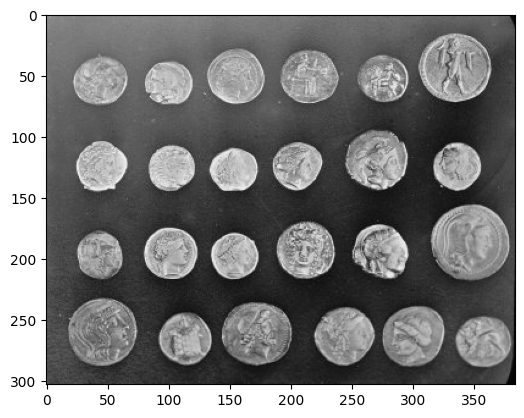

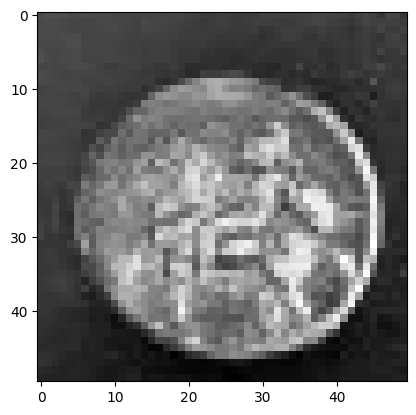

In [ ]:
from skimage import data
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

img =  data.coins()
img = img/(np.max(img))
plt.figure()
plt.imshow(img,cmap='gray')
patch = img[25:75, 250:300]
plt.figure()
plt.imshow(patch,cmap='gray')
img

### Answer

In [ ]:
def ssd(img1, img2):
    assert(img1.shape == img2.shape)
    ssd = 0
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            ssd += (img1[i, j] - img2[i, j])**2
    return ssd

In [ ]:
import sys

def locate_patch(img, patch):
    min_ssd = sys.float_info.max
    min_x, min_y = 0, 0
    for i in range(0, img.shape[0]-patch.shape[0]+1, patch.shape[0]//2):
        for j in range(0, img.shape[1]-patch.shape[1]+1, patch.shape[1]//2):
            cur_patch = img[i:i+patch.shape[0], j:j+patch.shape[1]]
            cur_ssd = ssd(cur_patch, patch)
            if cur_ssd < min_ssd:
                min_ssd = cur_ssd
                min_x, min_y = i, j
    return min_x, min_y

In [ ]:
min_x, min_y = locate_patch(img, patch)
min_ssd_patch = img[min_x:min_x+patch.shape[0], min_y:min_y+patch.shape[1]]

upper left corner of the patch: (25, 250)


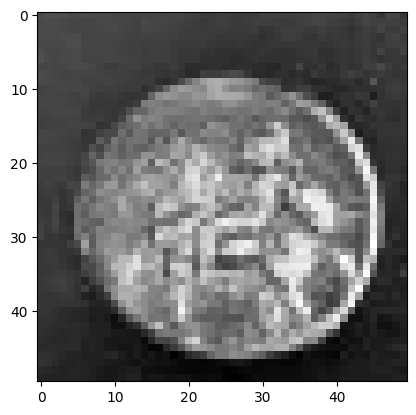

In [ ]:
print("upper left corner of the patch: ({}, {})".format(min_x, min_y))
plt.imshow(min_ssd_patch, cmap='gray')

### 2.2
Now, add zero mean Gaussian noise with standard deviation $\sigma = 0.1$ to the patch. Then, use the SSD again to locate the noise corrupted patch. Are you still able to recover its location?

### Answer

In [ ]:
def add_gaussian_noise(input_image, mean, sigma):
    noisy_image = input_image + np.random.normal( loc=mean, scale=sigma, size=np.shape(input_image) )
    return np.clip(noisy_image,a_min=0,a_max=255).astype('float32')

noisy_patch = add_gaussian_noise(patch, 0, 0.1)

In [ ]:
gaussian_min_x, gaussian_min_y = locate_patch(img, noisy_patch)
gaussian_min_ssd_patch = img[gaussian_min_x:gaussian_min_x+noisy_patch.shape[0], gaussian_min_y:gaussian_min_y+noisy_patch.shape[1]]

upper left corner of the patch: (25, 250)


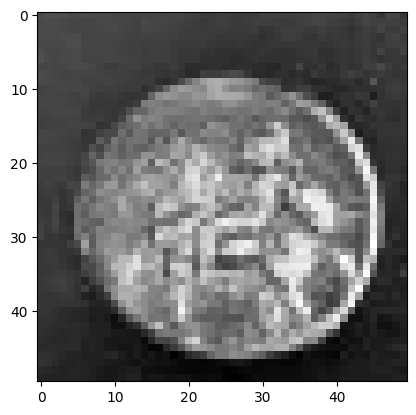

In [ ]:
print("upper left corner of the patch: ({}, {})".format(gaussian_min_x, gaussian_min_y))
plt.imshow(gaussian_min_ssd_patch, cmap="gray")

Yes, I'm still able to recover the location, even with the noisy patch.

### 2.3
We will now calculate translation between two images using the Phase Correlation method. An image $I$ and its translated version $I'$ are related by the Fourier shift theorem. This can be used to find the translation between two images. For this question, we will apply first translation to the coin image. Use `cv2.warpAffine` to translate the image by (-10,-10) in x and y directions. The output image will have the same size as the original one. Plot the translated image.

### Answer

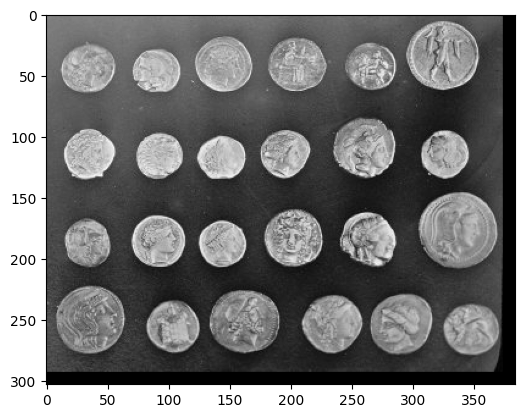

In [ ]:
import cv2

m = np.array([[1., 0., -10.], [0., 1., -10.]])
translated_img = cv2.warpAffine(img, m, (img.shape[1], img.shape[0]))
plt.imshow(translated_img, cmap="gray")

### 2.4
Now, write a function

```
def cps(img1,img2):
```
that calculates the normalized cross power spectrum (CPS) between two images. The CPS is calculated as follows:
$$
\frac{F_1(u,v)F_2^*(u,v)}{|F_1(u,v)F_2(u,v)|}
$$
where $F_1(u,v)$ is the Fourier transform of the first image and $F_2^*(u,v)$ is the complex conjugate of the Fourier transform of the second image.



### Answer

In [ ]:
from scipy.fft import fft, ifft, fft2

def cps(img1, img2):
    f1 = fft2(img1)
    f2 = fft2(img2)
    return f1*np.conj(f2)/np.abs(f1*f2 + 1e-10) ##f1*f can result in zero, so add insignificant value to prevent zero

In [ ]:
cps_signal = cps(img, translated_img)

(303, 384)
(303, 384)
(303, 384)
(303, 384)


### 2.5


Now, apply inverse Fourier transform to the CPS you calculated in **2.4**. Once you have calculated the inverse Fourier transform of CPS, what is the maximum of the inverse Fourier transform of CPS and where is it located? Are you able to figure out translation between two images using the index of maximum?

### Answer

In [ ]:
ifft_cps_signal = np.real(np.fft.ifft2(cps_signal))
print("inverse Fourier Transform of CPS: ", ifft_cps_signal)
max = np.max(ifft_cps_signal)
print("Maximum ifft_cps_signal value: ", max)
coordinates = np.where(ifft_cps_signal == max)
maxy = coordinates[0][0]
maxx = coordinates[1][0]
print("Coordinates: ", maxx, maxy)

inverse Fourier Transform of CPS:  [[ 5.71268810e-03  4.22956913e-03  3.55919374e-03 ...  2.66761174e-03
   3.30401173e-03  2.94719434e-03]
 [ 1.65419748e-03 -1.69006128e-03 -1.48312521e-03 ... -1.00123853e-03
  -1.12094322e-03 -2.23542461e-03]
 [ 3.48970609e-03  9.14347331e-05  5.80356934e-04 ...  3.33852197e-04
   4.27008315e-04 -2.81487710e-04]
 ...
 [ 2.81465098e-03 -3.45663103e-04  5.27194587e-04 ...  2.81198626e-04
   4.11681445e-04 -5.38839079e-04]
 [ 2.36375451e-03 -2.90987167e-05 -4.43900506e-04 ... -1.13843586e-03
  -2.75156659e-04 -1.59827696e-03]
 [ 3.04212937e-03 -1.12246890e-04 -8.73008773e-04 ... -1.06012263e-03
  -5.11019248e-04 -1.47364523e-03]]
Maximum ifft_cps_signal value:  0.9787177311906056
Coordinates:  10 10


We are able to figure out the translation between the 2 images - (10, 10), which is expected because that's how much we translated in the beginning.

### 2.6
Finally, we are going to do image registration with corrupted translated image. This time, instead of corrupting with noise, we will corrupt the image by randomly setting 25% of the pixel values to zero. These zero pixels can be treated as invalid pixels due to a faulty detector or to edges that are not affected by translation. Write a function


```
def mask(img,percentage):
```
that generates a mask $M$ such that the corrupted image (with a specific percentage of pixels set to be zero) can be generated by multiplying the original image with the mask. Once we generate the mask, corrupt the translated image from **2.3**.
Plot the mask and the corrupted image.


### Answer

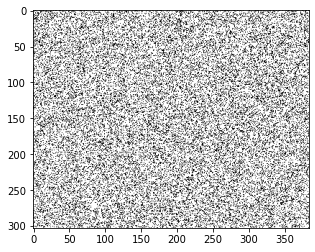

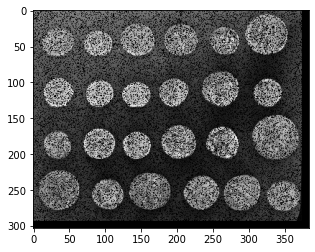

In [ ]:
import random
def mask(img, percentage):
  ret = np.ones_like(img)
  for x in range(0, img.shape[0]):
    for y in range(0, img.shape[1]):
        if(random.randint(1, 100)  <= percentage):
            ret[x][y] = 0;
  return ret;
result = mask(translated_img, 25)
translated_corrupted_img = translated_img*result
plt.figure()
plt.imshow(result, cmap="gray")
plt.figure()
plt.imshow(translated_corrupted_img, cmap="gray")

### 2.7
We will then identify the shift between corrupted image and the original image. We will use `phase_cross_correlation` from `skimage.registration` to do this. The function will use masked normalized cross correlation to identify relative shift between two images. In order to evaluate the effect of masking, we will use different masks. First, set `reference_mask` to be the mask we generated in **2.6**, and calculate the shift using `phase_cross_correlation`. Then, generate a new mask by setting the percentage of corrupted pixels to 75%. Set `reference_mask` to be the newly generated mask. Are you still able to correctly detect the translation between the images?

### Answer

In [ ]:
from skimage.registration import phase_cross_correlation
reference_mask_25 = mask(translated_img, 25)
plt.figure()
shift_25 = phase_cross_correlation(img, translated_img*reference_mask_25, reference_mask = reference_mask_25)
print("with 25% of corrupted pixels: ", shift_25)
reference_mask_75 = mask(translated_img, 75)
shift_75 = phase_cross_correlation(img, translated_img*reference_mask_75, reference_mask = reference_mask_75)
print("with 75% of corrupted pixels: ", shift_75)

with 25% of corrupted pixels:  [10. 10.]
with 75% of corrupted pixels:  [0. 0.]


<Figure size 432x288 with 0 Axes>

We are not able to correctly detect the translation between the two images anymore, because there is a shift of (0,0).